# Question 1

**Assuming Grayscale Images!**

Code for NCC:

In [60]:
import numpy as np
import scipy as sp

In [83]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

# No need for padding here. This is to be used only for tempplate matching
# Neighborhood is pixels to the right
# This makes it simpler in case of rectangular kernel. 

def my_ncc(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    k2 = (int(kernel.shape[1]/2))
    im_out = np.zeros(im_in.shape)
    
    # padding
    #print(im_in)
    
    for i in range(0, im_in.shape[0]-kernel.shape[0]+1):
        for j in range(0, im_in.shape[1]-kernel.shape[1]+1):
                        
            p_sum = 0
            
#             b = []
            
#             for ii in range(-k, k+1):
#                 for jj in range(-k, k+1):
#                     i_idx = i+ii
#                     j_idx = j+jj
#                     if (i_idx) < 0 or (i_idx) >=im_in.shape[0] or j_idx < 0 or (j_idx) >=im_in.shape[0]:
#                         b.append(0)
#                     else:
#                         b.append(im_in[i+ii][j+jj])
            
            
            
            # if remove padding then need to change im_out indices here to i, j
            sec = im_in[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            ncc_mean = np.mean(sec)
            ncc_std = np.std(sec)
            
            
            if ncc_std == 0:
                ncc_std = 1
            
            im_out[i][j] = np.sum(np.multiply(kernel, (sec-ncc_mean)/ncc_std))
            
            
    
    return im_out

In [85]:
#Test example
#my_ncc(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

## (A)

(355, 290)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

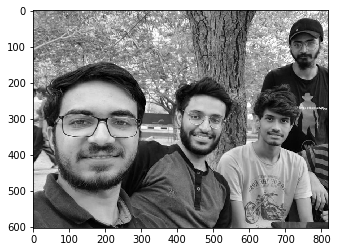

In [90]:
import matplotlib.pyplot as plt
q1_a_in = plt.imread('my.jpg')
q1_a_t = plt.imread('my_temp1.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

print(rgb2gray(q1_a_t).shape)

q1_a_in = rgb2gray(q1_a_in)
q1_a_t = rgb2gray(q1_a_t)

plt.imshow(q1_a_in, cmap='gray')
plt.plot

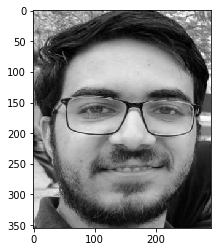

In [91]:
plt.imshow(q1_a_t, cmap='gray')


In [92]:
q1_a_out = my_ncc(q1_a_in, q1_a_t)

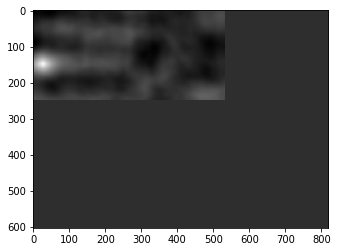

In [93]:
plt.imshow(q1_a_out, cmap='gray')

## Explaination of results

In my NCC function for template matching, we are given inputs that are rectangular matrices. That's why, I have used this (translated) corelation:

out(i,j) = $ \sum_{u,v} {in(i+u, j+v) * template(u,v)} $

The **peak** intensity occurs at a point where the template is fully matched. Since this correlation function writes the correlation value at the top right corner of the sub-image, the peak white spot obtained in the image (near (0,150)) is because the template's top right corner in that image is located at that point.

Bottom right has black pixels, because this correlation function writes values only to top right corner, and we haven't done any padding (don't need for template matching). So, the bottom and right sub-images have their corresponding co-relation values written to their top right corners in the output. Sub images whic

## (B)

(21, 22)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

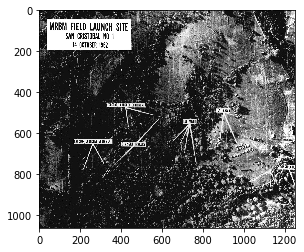

In [67]:
import matplotlib.pyplot as plt
q1_b_in = plt.imread('u2cuba.jpg')
q1_b_t = plt.imread('trailer.png')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

print(rgb2gray(q1_b_t).shape)

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)

plt.imshow(q1_b_in, cmap='gray')
plt.plot

In [68]:
# a = np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
# a= np.pad(a, [1], 'constant', constant_values=[0,8])
# print(a)

In [142]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)


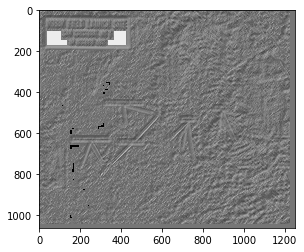

In [143]:
plt.imshow(q1_b_out, cmap='gray')

## (C)

In [150]:
q1_b_t = plt.imread('trailerSlightlyBigger.png')
q1_b_in = plt.imread('u2cuba.jpg')

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)


In [151]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)

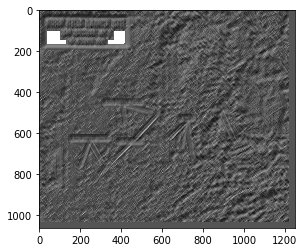

In [154]:
plt.imshow(q1_b_out, cmap='gray')

# Question 2 - myconv2d

* The input image is **padded** with '0' pixels as necessary.
* Input image and kernel are assumed to be **square** matrices.

In [22]:
import numpy as np

In [23]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

In [37]:
# 
# Assuming an ODD x ODD Kernel
# Arguments: 2 np (matrices)
def my_conv2d(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    
    im_out = np.zeros(im_in.shape)
    
    lim = im_in.shape[0]
    
    #print(im_in)
    
    p_im_in = my_pad(im_in, k, k)
    
    #print(im_in)
    
    
    for i in range(k, lim+k):
        for j in range(k, lim+k):
                
            sec = p_im_in[i-k:i+k+1, j-k:j+k+1]
            
            im_out[i-k][j-k] = np.sum(np.multiply(kernel, sec))     
    
    return im_out
    


In [57]:
# Test example
# my_conv2d(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

# Question 3

## (A)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [31]:
q3_in = plt.imread('clown.tif')
#q3_in = rgb2gray(q3_in)

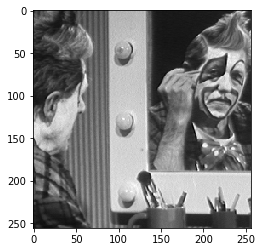

In [35]:
plt.imshow(q3_in, cmap='gray')


In [41]:
sobel_x = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

### Using Sobel for vertical edges

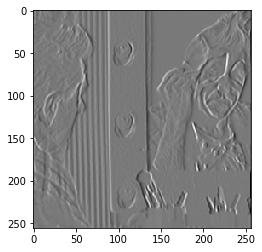

In [44]:
q3_sbx = my_conv2d((q3_in), sobel_x)
plt.imshow(q3_sbx, cmap='gray')


### Using Sobel for Horizontal Edges

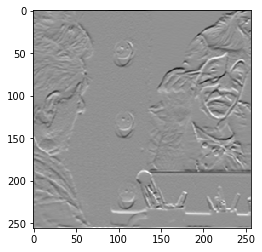

In [45]:
q3_sby = my_conv2d((q3_in), sobel_y)
plt.imshow(q3_sby, cmap='gray')

### Approx Magnitude of Filter responses

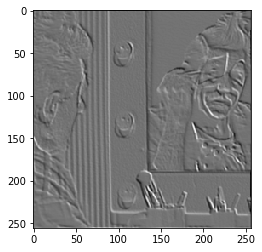

In [46]:
plt.imshow(q3_sbx+q3_sby, cmap='gray')

### Using Laplacian

In [47]:
lap = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])

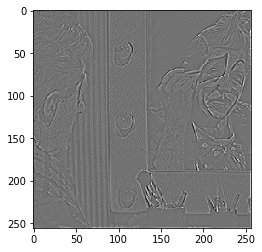

In [48]:
q3_lap = my_conv2d((q3_in), lap)
plt.imshow(q3_lap, cmap='gray')

### Comments

Sobel_X filter detects vertical edges (or edges that have a vertical component) - it does not detect any completely horizontal edge. Similarly, Sobel_y detects horizontal edges.

Approximately adding both the resulting images gives a result that has both the horizontal and vertical edges. 

Edges detected by Laplacian seem to be finer compared to the ones detected by Sobel. Sobel detects thicker edges, which are easier for visibility but Laplacian seems to give a finer, more accurate result. The result from Laplacian seems a bit grainy.

## (B) Using scipy's convolve2d.

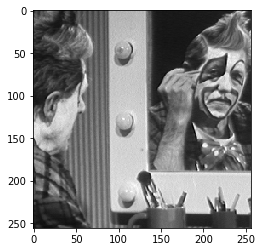

In [49]:
from scipy import signal
plt.imshow(q3_in, cmap='gray')


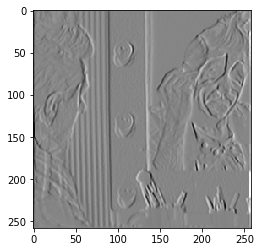

In [53]:
q3_sbx = signal.convolve2d((q3_in), sobel_x)
plt.imshow(q3_sbx, cmap='gray')


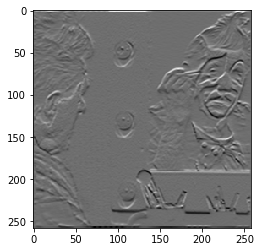

In [54]:
q3_sby = signal.convolve2d((q3_in), sobel_y)
plt.imshow(q3_sby, cmap='gray')


### Sum of Sobel Filter responses

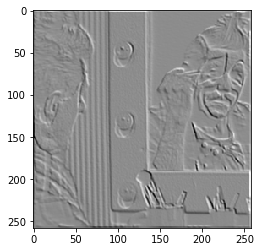

In [55]:
plt.imshow(q3_sbx+q3_sby, cmap='gray')

### Gaussian

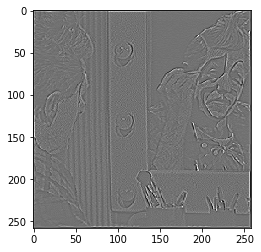

In [56]:
q3_lap = signal.convolve2d((q3_in), lap)
plt.imshow(q3_lap, cmap='gray')

### Comments

Scipy's convolve2d seems to a bit faster than myconv2d.

# Question 4